# Convolutional Neural Nets

This type of neural nets are predominantly (and heavily) used in image processing.
https://www.youtube.com/watch?v=BcEapJEKz3M

## Useful terms:

1. Convolution
2. Max pooling
2. Softmax
3. Cross Entropy

## Further Readings:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BcEapJEKz3M?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

mnist = input_data.read_data_sets('./')

Using TensorFlow backend.


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)
num_pixels = x.shape[1]
width = 28
height = 28

In [3]:
x.shape

(20, 784)

In [41]:
28*28

784

In [4]:
y.shape

(20,)

In [5]:
y

array([8, 8, 8, 0, 7, 1, 4, 8, 7, 8, 4, 9, 1, 0, 5, 0, 5, 7, 7, 4], dtype=uint8)

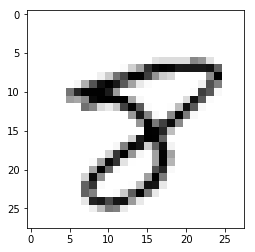

In [6]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

## Basic logistic multiclass classification:

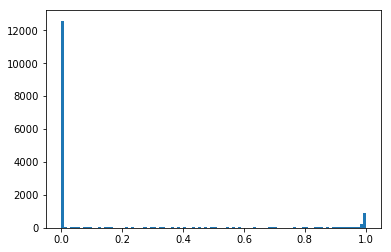

In [7]:
plt.hist(x.ravel(),100)
plt.show()

In [8]:
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(1000)

In [9]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = logistic.predict(x_test)
y_pred[:10]

array([2, 1, 0, 8, 2, 6, 1, 9, 1, 0], dtype=uint8)

Predicting the probabilities for the first 3 images:

In [11]:
logistic.predict_proba(x_test[:3])

array([[  1.00464678e-05,   7.34788286e-05,   5.55601362e-01,
          3.76713648e-05,   7.78980604e-07,   3.08947507e-04,
          4.43483003e-01,   5.25947388e-10,   4.75286972e-04,
          9.42502338e-06],
       [  6.84467773e-04,   9.13792521e-01,   1.68375885e-03,
          7.05362594e-03,   8.33105878e-05,   6.42039023e-04,
          2.64083947e-04,   2.07489885e-04,   7.53772835e-02,
          2.11419043e-04],
       [  5.42632046e-01,   5.23614019e-05,   2.52195485e-06,
          7.87723555e-06,   7.00215717e-03,   3.52044691e-01,
          8.40985294e-02,   1.41449207e-02,   5.24138014e-07,
          1.43702060e-05]])

Accuracy of the predictions:

In [12]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.88

## Keras Multilayered Perceptron (Neural Net)

In [13]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

### Zero hidden layers

It is important to note that when we do classification problems we use the **Categorical Crossentropy Loss**. When its only two classes we can use Logistic Loss (Binary Crossentropy Loss). Finally for regression problems we use **Mean Squared Error**.

The Cross Entropy loss is defined as:
$$\mathcal{L} = -\frac{1}{N}\sum_i \mathcal{I}(y_i=1)\log(p_{i1})+\mathcal{I}(y_i=2)\log(1-p_{i2})+\cdots++\mathcal{I}(y_i=K)\log(1-p_{iK})$$
where $N$ is the number of training instances, $K$ is the number of classes and $p_{ik}$ is the probability that instance $i$ belongs to $k$.

Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [14]:
model = Sequential()
model.add(Dense(units=10, input_dim=num_pixels, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [15]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s - loss: 1.3301     


In [16]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

  32/1000 [..............................] - ETA: 0s

array([6, 1, 0, 7, 9, 6, 1, 9, 1, 0])

In [17]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.849

### 1 Hidden Layer

In [18]:
model = Sequential()
model.add(Dense(units=50, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [19]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s - loss: 0.8011     


In [20]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

  32/1000 [..............................] - ETA: 0s

0.905

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760.0
Trainable params: 39,760
Non-trainable params: 0.0
_________________________________________________________________


In [42]:
784*50+50

39250

## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

In [22]:
# Need to reshape the x values to a 28x28 image
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250890    
Total params: 251,210.0
Trainable params: 251,210.0
Non-trainable params: 0.0
_________________________________________________________________


In [26]:
28*28*32

25088

In [27]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 20s - loss: 0.4835    


In [28]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

 992/1000 [============================>.] - ETA: 0s

0.93

### Using the max pooling layer:

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                62730     
Total params: 63,050.0
Trainable params: 63,050.0
Non-trainable params: 0.0
_________________________________________________________________


In [31]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 21s - loss: 0.6134    


In [32]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

 832/1000 [=======================>......] - ETA: 0s

0.911

## Multi Layer Convolutional Network:

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 288)               0         
__________

In [35]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 53s - loss: 0.6373    


In [36]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

1000/1000 [==============================] - 0s     


0.96

In [ ]:
model.pred